# [IAPR 2019:][iapr2019] Special project

**Group members:**
    1- first name and last name,
    2- first name and last name,
    3- first name and last name

**Due date:** 30.05.2019

[iapr2019]: https://github.com/LTS5/iapr-2019


## Description
Please find the description of this special project via [this link].

[this link]: https://github.com/LTS5/iapr-2019/blob/master/project/special_project_description.pdf

In [2]:
import os
import skimage
import numpy as np
import matplotlib.pyplot as plt
# Load images
# get name of files
name_file = open("../data/project-data/train.txt", "r")
im_names = name_file.read().split('\n')
image_path = '../data/project-data/images/train/'
# Load images
filenames = [os.path.join(image_path, name) + '.jpg' for name in im_names]
ic = skimage.io.imread_collection(filenames)
print('Number of images: ', len(ic))

Number of images:  800


In [3]:
import xml.etree.ElementTree as ET

def parse_file(filename):
    """ Parse a PASCAL VOC xml file """
    tree = ET.parse(filename)
    objects = []
    for obj in tree.findall('object'):
        obj_struct = {}
        obj_struct['name'] = obj.find('name').text
        bbox = obj.find('bndbox')
        obj_struct['bbox'] = [int(float(bbox.find('xmin').text)),
                              int(float(bbox.find('ymin').text)),
                              int(float(bbox.find('xmax').text))-int(float(bbox.find('xmin').text)),
                              int(float(bbox.find('ymax').text))-int(float(bbox.find('ymin').text))]
        objects.append(obj_struct)

    return objects

In [4]:
anno_path = '../data/project-data/annotations/train/'
annotations_xmls = [parse_file(os.path.join(anno_path, name) + '.xml') for name in im_names]

## Part 1: Finding varroas by segmentation
Add your implementation for ''**detect_by_segmentation**'' function. Please make sure the input and output follows the mentioned format.

In [1]:
def detect_by_segmentation(img):
    '''
    Input: One single image
    Output: A numpy array containing coordonates of all detected varroas, with the following format: 
            [[x_1, y_1, w_1, h_2], [x_2, y_2, w_1, h_2], ..., [x_n, y_n, w_n, h_n]] 
            where ''n'' is the number of detected varroas.
    '''

    #Your code

Add your implementation. Report the Precision, Recall and F1-score, by using all 50 images of the test-set, and considering 0.3 as the IoU threshold.

## Part 2: Implement your first detector

Write your function(s) for the second part. Feel free to change the name of the function and add your additional functions, but please make sure their input and output follows the mentioned format.

In [4]:
# check that no bouding box is bigger that 64 (meaning all 64 sided window including a bounding box have varroa)
for i in range(0,800) :
    for anno in annotations_xmls[i]:
        if (anno['bbox'][3] > 64 and anno['bbox'][2] > 64):
            print(i,anno['bbox'][3],anno['bbox'][2])

In [3]:
def detect_by_method_1(img):
    '''
    Input: One single image
    Output: A numpy array containing coordonates of all detected varroas, with the following format: 
            [[x_1, y_1, w_1, h_2], [x_2, y_2, w_1, h_2], ..., [x_n, y_n, w_n, h_n]] 
            where ''n'' is the number of detected varroas.
    '''

    #sliding window get classification 
    for (x, y, window) in sliding_window(ic[n_im], stepSize=8, windowSize=64):
    labels.append(get_labbel(x,y,window.shape[0],n_im))
    # classification per window 
    
    

In [5]:
def sliding_window(image, stepSize, windowSize):
    # slide a window across the image
    for y in range(0, image.shape[0], stepSize):
        for x in range(0, image.shape[1], stepSize):
        # yield the current window
            yield (x, y, image[y:y + windowSize, x:x + windowSize])

In [6]:
def overlap(rect1, rect2):  
    '''Computes the overlapping area of two rectangle'''
    dx = min(rect1.xmax, rect2.xmax) - max(rect1.xmin, rect2.xmin)
    dy = min(rect1.ymax, rect2.ymax) - max(rect1.ymin, rect2.ymin)
    if (dx>=0) and (dy>=0):
        return dx*dy
    else: return 0

In [7]:
from collections import namedtuple
def get_labbel(x,y,h,n_im) :
    """ for an square window of side h, labbel it as 0 if it has an iou > 0.9 with one of the bounding box of the 
    ground truth, 1 otherwise"""
    max_iou = 0
    Rectangle = namedtuple('Rectangle', 'xmin ymin xmax ymax')
    for anno in annotations_xmls[n_im]:
        grd_t = Rectangle(anno['bbox'][0], anno['bbox'][1], anno['bbox'][2]+anno['bbox'][0], anno['bbox'][3]+anno['bbox'][1])
        f_box = Rectangle(x, y, x + h, y + h)
        overlap_area = overlap(grd_t,f_box)
        grd_truth_a = anno['bbox'][2]*anno['bbox'][3]
        # if a bouding box is over 50% in the window we assume a varroa is present 
        if (overlap_area/grd_truth_a == 1
           ) :
            return 0
    return 1

In [8]:
def get_longest_contour(contours):
    """Select the biggest contour """
    max_c = []
    for c in contours:
        if len(c) > len(max_c):
            max_c = c
            
    return max_c

In [351]:
from skimage.filters import threshold_otsu
from skimage.measure import find_contours
from skimage.color import rgb2gray
def get_fourier_descr(image):
    """ Get ratio of Fourier descriptor of an image using only the amplitude, and not the first descrpitor
    resulting descriptor are invariant to scaling, rotation and translation  """
    """Inputs : The image to analyse
       Output : amplitude of the first four Fourier descriptor ."""
    #thresh = threshold_otsu(image)
    #thresh2 = threshold_otsu(image[image < thresh])
    #binary = (image < thresh2)
    contours = find_contours(image,0)
    max_contour = get_longest_contour(contours)
    if(len(max_contour) == 0) :
        return (25,25)
    contour_complex = np.empty(max_contour.shape[0], dtype=complex)
    contour_complex.real = max_contour[:, 0]
    contour_complex.imag = max_contour[:, 1]
    descpr = np.fft.fft(contour_complex)
    if (descpr.size > 4) :
        return (abs(descpr[2])/abs(descpr[1]),abs(descpr[3])/abs(descpr[1]))
    else :
        return (25,25)

In [408]:
import skimage 
from skimage.measure import regionprops
def labbel_features(image):
    """ Get ratio of Fourier descriptor of an image using only the amplitude, and not the first descrpitor
    resulting descriptor are invariant to scaling, rotation and translation  """
    """Inputs : The image to analyse
       Output : amplitude of the first four Fourier descriptor ."""
    
    #Label image
    label_image = skimage.measure.label(image)
    proprieties = regionprops(label_image)
    
    #Keep the label in the correct size range and with an approcimatively squared bbox
    large_label = [prop for prop in proprieties if (prop.area > 4 and prop.area < 900) and 
                   (max(prop.bbox[3]-prop.bbox[1],prop.bbox[2]-prop.bbox[0])/min(prop.bbox[3]-prop.bbox[1],prop.bbox[2]-prop.bbox[0])<2)]
    
    max_contour = []
    for l in large_label:
        fc = find_contours(image[l.bbox[0]:l.bbox[2],l.bbox[1]:l.bbox[3]],0)
        if len(fc) > 0 : 
            fc = get_longest_contour(fc)
            if len(fc) > len(max_contour):
                max_contour = fc
    if(len(max_contour) == 0) :
        return (25,25)
    contour_complex = np.empty(max_contour.shape[0], dtype=complex)
    contour_complex.real = max_contour[:, 0]
    contour_complex.imag = max_contour[:, 1]
    descpr = np.fft.fft(contour_complex)
    if (descpr.size > 4) :
        return (abs(descpr[2])/abs(descpr[1]),abs(descpr[3])/abs(descpr[1]))
    else :
        return (25,25)

In [61]:
import cProfile
for (x, y, window) in sliding_window(value_img, stepSize=30, windowSize=124):
    cProfile.run('get_labbel(x,y,window.shape[0],n_im)')

         72 function calls (71 primitive calls) in 0.000 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        3    0.000    0.000    0.000    0.000 <frozen importlib._bootstrap>:997(_handle_fromlist)
        1    0.000    0.000    0.000    0.000 <ipython-input-5-e47d0a421274>:1(overlap)
        1    0.000    0.000    0.000    0.000 <ipython-input-6-c0fe91513711>:2(get_labbel)
        1    0.000    0.000    0.000    0.000 <string>:1(<module>)
        2    0.000    0.000    0.000    0.000 <string>:12(__new__)
        1    0.000    0.000    0.000    0.000 <string>:5(Rectangle)
        1    0.000    0.000    0.000    0.000 __init__.py:357(namedtuple)
        5    0.000    0.000    0.000    0.000 __init__.py:420(<genexpr>)
        5    0.000    0.000    0.000    0.000 __init__.py:422(<genexpr>)
        2    0.000    0.000    0.000    0.000 {built-in method __new__ of type object at 0x10fe5ddd8}
        1    0.000    0.000    

         234 function calls (233 primitive calls) in 0.001 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        3    0.000    0.000    0.000    0.000 <frozen importlib._bootstrap>:997(_handle_fromlist)
       19    0.000    0.000    0.000    0.000 <ipython-input-5-e47d0a421274>:1(overlap)
        1    0.000    0.000    0.000    0.000 <ipython-input-6-c0fe91513711>:2(get_labbel)
        1    0.000    0.000    0.000    0.000 <string>:1(<module>)
       38    0.000    0.000    0.000    0.000 <string>:12(__new__)
        1    0.000    0.000    0.000    0.000 <string>:5(Rectangle)
        1    0.000    0.000    0.000    0.000 __init__.py:357(namedtuple)
        5    0.000    0.000    0.000    0.000 __init__.py:420(<genexpr>)
        5    0.000    0.000    0.000    0.000 __init__.py:422(<genexpr>)
       38    0.000    0.000    0.000    0.000 {built-in method __new__ of type object at 0x10fe5ddd8}
        1    0.000    0.000  

        1    0.000    0.000    0.000    0.000 {built-in method builtins.__build_class__}
      2/1    0.001    0.001    0.002    0.002 {built-in method builtins.exec}
        4    0.000    0.000    0.000    0.000 {built-in method builtins.hasattr}
        2    0.000    0.000    0.000    0.000 {built-in method builtins.isinstance}
        1    0.000    0.000    0.000    0.000 {built-in method builtins.len}
       38    0.000    0.000    0.000    0.000 {built-in method builtins.max}
       38    0.000    0.000    0.000    0.000 {built-in method builtins.min}
        1    0.000    0.000    0.000    0.000 {built-in method builtins.repr}
        1    0.000    0.000    0.000    0.000 {built-in method sys._getframe}
        5    0.000    0.000    0.000    0.000 {method '__contains__' of 'frozenset' objects}
        4    0.000    0.000    0.000    0.000 {method 'add' of 'set' objects}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}
        9    0.

        5    0.000    0.000    0.000    0.000 {method 'isidentifier' of 'str' objects}
        2    0.000    0.000    0.000    0.000 {method 'join' of 'str' objects}
        2    0.000    0.000    0.000    0.000 {method 'replace' of 'str' objects}
        1    0.000    0.000    0.000    0.000 {method 'split' of 'str' objects}
        4    0.000    0.000    0.000    0.000 {method 'startswith' of 'str' objects}


         117 function calls (116 primitive calls) in 0.001 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        3    0.000    0.000    0.000    0.000 <frozen importlib._bootstrap>:997(_handle_fromlist)
        6    0.000    0.000    0.000    0.000 <ipython-input-5-e47d0a421274>:1(overlap)
        1    0.000    0.000    0.001    0.001 <ipython-input-6-c0fe91513711>:2(get_labbel)
        1    0.000    0.000    0.001    0.001 <string>:1(<module>)
       12    0.000    0.000    0.000    0.000 <string>:12(__new__)
    

       14    0.000    0.000    0.000    0.000 {built-in method __new__ of type object at 0x10fe5ddd8}
        1    0.000    0.000    0.000    0.000 {built-in method builtins.__build_class__}
      2/1    0.001    0.000    0.001    0.001 {built-in method builtins.exec}
        4    0.000    0.000    0.000    0.000 {built-in method builtins.hasattr}
        2    0.000    0.000    0.000    0.000 {built-in method builtins.isinstance}
        1    0.000    0.000    0.000    0.000 {built-in method builtins.len}
       14    0.000    0.000    0.000    0.000 {built-in method builtins.max}
       14    0.000    0.000    0.000    0.000 {built-in method builtins.min}
        1    0.000    0.000    0.000    0.000 {built-in method builtins.repr}
        1    0.000    0.000    0.000    0.000 {built-in method sys._getframe}
        5    0.000    0.000    0.000    0.000 {method '__contains__' of 'frozenset' objects}
        4    0.000    0.000    0.000    0.000 {method 'add' of 'set' objects}
        

        4    0.000    0.000    0.000    0.000 {method 'add' of 'set' objects}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}
        9    0.000    0.000    0.000    0.000 {method 'format' of 'str' objects}
        1    0.000    0.000    0.000    0.000 {method 'get' of 'dict' objects}
        5    0.000    0.000    0.000    0.000 {method 'isidentifier' of 'str' objects}
        2    0.000    0.000    0.000    0.000 {method 'join' of 'str' objects}
        2    0.000    0.000    0.000    0.000 {method 'replace' of 'str' objects}
        1    0.000    0.000    0.000    0.000 {method 'split' of 'str' objects}
        4    0.000    0.000    0.000    0.000 {method 'startswith' of 'str' objects}


         234 function calls (233 primitive calls) in 0.006 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        3    0.000    0.000    0.000    0.000 <frozen importlib._bootstrap>:997(_h

        2    0.000    0.000    0.000    0.000 {method 'replace' of 'str' objects}
        1    0.000    0.000    0.000    0.000 {method 'split' of 'str' objects}
        4    0.000    0.000    0.000    0.000 {method 'startswith' of 'str' objects}


         234 function calls (233 primitive calls) in 0.003 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        3    0.000    0.000    0.000    0.000 <frozen importlib._bootstrap>:997(_handle_fromlist)
       19    0.000    0.000    0.000    0.000 <ipython-input-5-e47d0a421274>:1(overlap)
        1    0.000    0.000    0.002    0.002 <ipython-input-6-c0fe91513711>:2(get_labbel)
        1    0.000    0.000    0.002    0.002 <string>:1(<module>)
       38    0.000    0.000    0.000    0.000 <string>:12(__new__)
        1    0.000    0.000    0.000    0.000 <string>:5(Rectangle)
        1    0.000    0.000    0.002    0.002 __init__.py:357(namedtuple)
        5    0.000    0.000 

        1    0.000    0.000    0.001    0.001 <string>:1(<module>)
       38    0.000    0.000    0.000    0.000 <string>:12(__new__)
        1    0.000    0.000    0.000    0.000 <string>:5(Rectangle)
        1    0.000    0.000    0.001    0.001 __init__.py:357(namedtuple)
        5    0.000    0.000    0.000    0.000 __init__.py:420(<genexpr>)
        5    0.000    0.000    0.000    0.000 __init__.py:422(<genexpr>)
       38    0.000    0.000    0.000    0.000 {built-in method __new__ of type object at 0x10fe5ddd8}
        1    0.000    0.000    0.000    0.000 {built-in method builtins.__build_class__}
      2/1    0.000    0.000    0.001    0.001 {built-in method builtins.exec}
        4    0.000    0.000    0.000    0.000 {built-in method builtins.hasattr}
        2    0.000    0.000    0.000    0.000 {built-in method builtins.isinstance}
        1    0.000    0.000    0.000    0.000 {built-in method builtins.len}
       38    0.000    0.000    0.000    0.000 {built-in method buil

        1    0.000    0.000    0.000    0.000 {built-in method builtins.len}
       38    0.000    0.000    0.000    0.000 {built-in method builtins.max}
       38    0.000    0.000    0.000    0.000 {built-in method builtins.min}
        1    0.000    0.000    0.000    0.000 {built-in method builtins.repr}
        1    0.000    0.000    0.000    0.000 {built-in method sys._getframe}
        5    0.000    0.000    0.000    0.000 {method '__contains__' of 'frozenset' objects}
        4    0.000    0.000    0.000    0.000 {method 'add' of 'set' objects}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}
        9    0.000    0.000    0.000    0.000 {method 'format' of 'str' objects}
        1    0.000    0.000    0.000    0.000 {method 'get' of 'dict' objects}
        5    0.000    0.000    0.000    0.000 {method 'isidentifier' of 'str' objects}
        2    0.000    0.000    0.000    0.000 {method 'join' of 'str' objects}
        2    0.000   

        5    0.000    0.000    0.000    0.000 {method '__contains__' of 'frozenset' objects}
        4    0.000    0.000    0.000    0.000 {method 'add' of 'set' objects}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}
        9    0.000    0.000    0.000    0.000 {method 'format' of 'str' objects}
        1    0.000    0.000    0.000    0.000 {method 'get' of 'dict' objects}
        5    0.000    0.000    0.000    0.000 {method 'isidentifier' of 'str' objects}
        2    0.000    0.000    0.000    0.000 {method 'join' of 'str' objects}
        2    0.000    0.000    0.000    0.000 {method 'replace' of 'str' objects}
        1    0.000    0.000    0.000    0.000 {method 'split' of 'str' objects}
        4    0.000    0.000    0.000    0.000 {method 'startswith' of 'str' objects}


         234 function calls (233 primitive calls) in 0.001 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno

        1    0.000    0.000    0.002    0.002 <ipython-input-6-c0fe91513711>:2(get_labbel)
        1    0.000    0.000    0.002    0.002 <string>:1(<module>)
       38    0.000    0.000    0.000    0.000 <string>:12(__new__)
        1    0.000    0.000    0.000    0.000 <string>:5(Rectangle)
        1    0.000    0.000    0.001    0.001 __init__.py:357(namedtuple)
        5    0.000    0.000    0.000    0.000 __init__.py:420(<genexpr>)
        5    0.000    0.000    0.000    0.000 __init__.py:422(<genexpr>)
       38    0.000    0.000    0.000    0.000 {built-in method __new__ of type object at 0x10fe5ddd8}
        1    0.000    0.000    0.000    0.000 {built-in method builtins.__build_class__}
      2/1    0.001    0.001    0.002    0.002 {built-in method builtins.exec}
        4    0.000    0.000    0.000    0.000 {built-in method builtins.hasattr}
        2    0.000    0.000    0.000    0.000 {built-in method builtins.isinstance}
        1    0.000    0.000    0.000    0.000 {built-

        5    0.000    0.000    0.000    0.000 __init__.py:420(<genexpr>)
        5    0.000    0.000    0.000    0.000 __init__.py:422(<genexpr>)
       38    0.000    0.000    0.000    0.000 {built-in method __new__ of type object at 0x10fe5ddd8}
        1    0.000    0.000    0.000    0.000 {built-in method builtins.__build_class__}
      2/1    0.000    0.000    0.001    0.001 {built-in method builtins.exec}
        4    0.000    0.000    0.000    0.000 {built-in method builtins.hasattr}
        2    0.000    0.000    0.000    0.000 {built-in method builtins.isinstance}
        1    0.000    0.000    0.000    0.000 {built-in method builtins.len}
       38    0.000    0.000    0.000    0.000 {built-in method builtins.max}
       38    0.000    0.000    0.000    0.000 {built-in method builtins.min}
        1    0.000    0.000    0.000    0.000 {built-in method builtins.repr}
        1    0.000    0.000    0.000    0.000 {built-in method sys._getframe}
        5    0.000    0.000    0.

        1    0.000    0.000    0.000    0.000 {built-in method builtins.__build_class__}
      2/1    0.001    0.000    0.001    0.001 {built-in method builtins.exec}
        4    0.000    0.000    0.000    0.000 {built-in method builtins.hasattr}
        2    0.000    0.000    0.000    0.000 {built-in method builtins.isinstance}
        1    0.000    0.000    0.000    0.000 {built-in method builtins.len}
       38    0.000    0.000    0.000    0.000 {built-in method builtins.max}
       38    0.000    0.000    0.000    0.000 {built-in method builtins.min}
        1    0.000    0.000    0.000    0.000 {built-in method builtins.repr}
        1    0.000    0.000    0.000    0.000 {built-in method sys._getframe}
        5    0.000    0.000    0.000    0.000 {method '__contains__' of 'frozenset' objects}
        4    0.000    0.000    0.000    0.000 {method 'add' of 'set' objects}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}
        9    0.

       14    0.000    0.000    0.000    0.000 <string>:12(__new__)
        1    0.000    0.000    0.000    0.000 <string>:5(Rectangle)
        1    0.000    0.000    0.001    0.001 __init__.py:357(namedtuple)
        5    0.000    0.000    0.000    0.000 __init__.py:420(<genexpr>)
        5    0.000    0.000    0.000    0.000 __init__.py:422(<genexpr>)
       14    0.000    0.000    0.000    0.000 {built-in method __new__ of type object at 0x10fe5ddd8}
        1    0.000    0.000    0.000    0.000 {built-in method builtins.__build_class__}
      2/1    0.001    0.001    0.002    0.002 {built-in method builtins.exec}
        4    0.000    0.000    0.000    0.000 {built-in method builtins.hasattr}
        2    0.000    0.000    0.000    0.000 {built-in method builtins.isinstance}
        1    0.000    0.000    0.000    0.000 {built-in method builtins.len}
       14    0.000    0.000    0.000    0.000 {built-in method builtins.max}
       14    0.000    0.000    0.000    0.000 {built-in m

        1    0.000    0.000    0.000    0.000 {built-in method sys._getframe}
        5    0.000    0.000    0.000    0.000 {method '__contains__' of 'frozenset' objects}
        4    0.000    0.000    0.000    0.000 {method 'add' of 'set' objects}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}
        9    0.000    0.000    0.000    0.000 {method 'format' of 'str' objects}
        1    0.000    0.000    0.000    0.000 {method 'get' of 'dict' objects}
        5    0.000    0.000    0.000    0.000 {method 'isidentifier' of 'str' objects}
        2    0.000    0.000    0.000    0.000 {method 'join' of 'str' objects}
        2    0.000    0.000    0.000    0.000 {method 'replace' of 'str' objects}
        1    0.000    0.000    0.000    0.000 {method 'split' of 'str' objects}
        4    0.000    0.000    0.000    0.000 {method 'startswith' of 'str' objects}


         234 function calls (233 primitive calls) in 0.002 seconds

   Ordered by

        1    0.000    0.000    0.000    0.000 {method 'get' of 'dict' objects}
        5    0.000    0.000    0.000    0.000 {method 'isidentifier' of 'str' objects}
        2    0.000    0.000    0.000    0.000 {method 'join' of 'str' objects}
        2    0.000    0.000    0.000    0.000 {method 'replace' of 'str' objects}
        1    0.000    0.000    0.000    0.000 {method 'split' of 'str' objects}
        4    0.000    0.000    0.000    0.000 {method 'startswith' of 'str' objects}


         234 function calls (233 primitive calls) in 0.001 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        3    0.000    0.000    0.000    0.000 <frozen importlib._bootstrap>:997(_handle_fromlist)
       19    0.000    0.000    0.000    0.000 <ipython-input-5-e47d0a421274>:1(overlap)
        1    0.000    0.000    0.001    0.001 <ipython-input-6-c0fe91513711>:2(get_labbel)
        1    0.000    0.000    0.000    0.000 <string>:1(<m

        1    0.000    0.000    0.001    0.001 __init__.py:357(namedtuple)
        5    0.000    0.000    0.000    0.000 __init__.py:420(<genexpr>)
        5    0.000    0.000    0.000    0.000 __init__.py:422(<genexpr>)
       38    0.000    0.000    0.000    0.000 {built-in method __new__ of type object at 0x10fe5ddd8}
        1    0.000    0.000    0.000    0.000 {built-in method builtins.__build_class__}
      2/1    0.001    0.000    0.001    0.001 {built-in method builtins.exec}
        4    0.000    0.000    0.000    0.000 {built-in method builtins.hasattr}
        2    0.000    0.000    0.000    0.000 {built-in method builtins.isinstance}
        1    0.000    0.000    0.000    0.000 {built-in method builtins.len}
       38    0.000    0.000    0.000    0.000 {built-in method builtins.max}
       38    0.000    0.000    0.000    0.000 {built-in method builtins.min}
        1    0.000    0.000    0.000    0.000 {built-in method builtins.repr}
        1    0.000    0.000    0.000 

KeyboardInterrupt: 

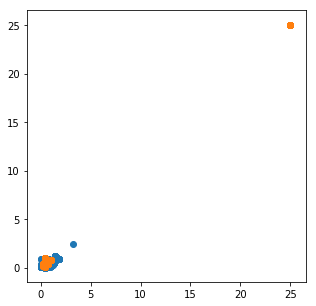

In [409]:
n_im = 100
varroa = []
no_varroa = []
size = 0
value_img = preprocess(ic[n_im])
for (x, y, window) in sliding_window(value_img, stepSize=8, windowSize=64):
    a1,a2 = labbel_features(window)
    label = get_labbel(x,y,window.shape[0],n_im)
    if (label == 0) :
        varroa.append([a1,a2])
    else :
        no_varroa.append([a1,a2])
fig,ax1 = plt.subplots(1, 1, figsize=(5, 5))
ax1.scatter(np.array(no_varroa)[:, 0], np.array(no_varroa)[:, 1])
ax1.scatter(np.array(varroa)[:,0], np.array(varroa)[:, 1])

In [19]:
def largest_label(labels):
    largest_label = labels[0]
    max_size = labels[0].area
    for l in labels:
        if l.area > max_size:
            largest_label = l
            max_size = l.area
    return largest_label
            

In [410]:
import skimage 
from skimage.measure import regionprops
def labbel_features_2(image,l):
    """ Get ratio of Fourier descriptor of an image using only the amplitude, and not the first descrpitor
    resulting descriptor are invariant to scaling, rotation and translation  """
    """Inputs : The image to analyse
       Output : amplitude of the first four Fourier descriptor ."""    
    #Label image
    label_image = skimage.measure.label(image)
    proprieties = regionprops(label_image)
    
    #Keep the label in the correct size range and with an approcimatively squared bbox
    large_label = [prop for prop in proprieties if ((prop.area < 900)) and 
                   (max(prop.bbox[3]-prop.bbox[1],prop.bbox[2]-prop.bbox[0])/min(prop.bbox[3]-prop.bbox[1],prop.bbox[2]-prop.bbox[0])<2)]
    if(l == 0):
        prop = largest_label(proprieties)
       # print(prop.area)
        plt.imshow(image)
    if (len(large_label) == 0 ):
        return (100,100)
    largest = largest_label(large_label)
    return largest.inertia_tensor_eigvals
    

In [16]:
from skimage.morphology import closing, opening
def preprocess(image):
    impre = image.copy()
    dark = np.logical_and(impre[:, :, 1] < 50,np.logical_and(impre[:, :, 0] < 50, impre[:, :, 2] < 50))
    impre[dark] = [255, 255, 255]
    impre[~dark] = [0, 0, 0]
    binary = rgb2gray(impre)
    binary = opening(binary)
    return binary

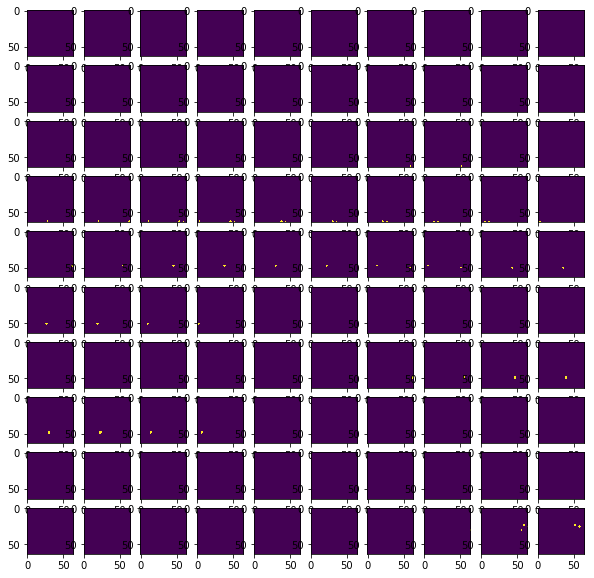

In [419]:
# Testing that the windowing works 
fig,axes = plt.subplots(10, 10, figsize=(10, 10))
axss = axes.ravel()
i = 0
for (x, y, window) in sliding_window(image, stepSize=8, windowSize=64):
    label = get_labbel(x,y,window.shape[0],n_im)
    if (i< 50) :
        if (label == 1) :
            axss[i].imshow(window)
            i += 1
    elif (i < 100) :
        if (label == 0) :
            axss[i].imshow(window)
            i += 1


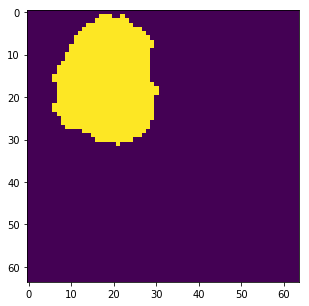

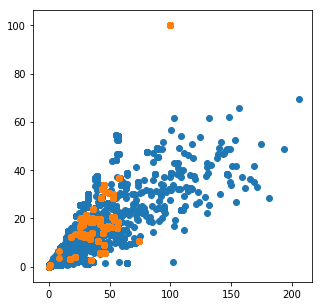

In [411]:
n_im = 4
varroa = []
no_varroa = []
size = 0

image = preprocess(ic[n_im])
fig,ax2 = plt.subplots(1, 1, figsize=(5, 5))
ax2.imshow(image)

for (x, y, window) in sliding_window(image, stepSize=8, windowSize=64):
    
    label = get_labbel(x,y,window.shape[0],n_im)
    if (label == 0) :
        a1,a2 = labbel_features_2(window,0)
        varroa.append([a1,a2])
        
    else :
        a1,a2 = labbel_features_2(window,1)
        no_varroa.append([a1,a2])
fig,ax1 = plt.subplots(1, 1, figsize=(5, 5))
ax1.scatter(np.array(no_varroa)[:, 0], np.array(no_varroa)[:, 1])
ax1.scatter(np.array(varroa)[:,0], np.array(varroa)[:, 1])

In [9]:
import skimage 
from skimage.measure import regionprops
def labbel_features_3(image):
    """ Get Features of the largest labbeled region in the current window. Here feature considered is the area of the 
    shape as well as the ratio of the two main eigenvalue of the tendsor"""
    """Inputs : The image to analyse
       Output : area and ratio from the eigenvector of the largest labbeled region ."""    
    #Label image
    label_image = skimage.measure.label(image)
    proprieties = regionprops(label_image)
    
    #Keep the label in the correct size range and with an approcimatively squared bbox
    if (len(proprieties) == 0 ):
        return 0,0,False
    largest = largest_label(proprieties)
    return largest.area,largest.inertia_tensor_eigvals[0]/largest.inertia_tensor_eigvals[1],True

In [ ]:
# Using ratio of two main eigenvalues (roundish) and area as features 
from skimage.color import rgb2gray
varroa = []
no_varroa = []
for n_im,im in zip(range(0,len(ic)),ic) :
    image = preprocess(im)
    for (x, y, window) in sliding_window(image, stepSize=8, windowSize=64):
        a1,a2,object_present = labbel_features_3(window)
        label = get_labbel(x,y,window.shape[0],n_im)
        if(object_present) :
            if (label == 0) :
                varroa.append([a1,a2])
            else :
                no_varroa.append([a1,a2])
fig,ax1 = plt.subplots(1, 1, figsize=(5, 5))
ax1.scatter(np.array(no_varroa)[:, 0], np.array(no_varroa)[:, 1])
ax1.scatter(np.array(varroa)[:,0], np.array(varroa)[:, 1])

/Users/oriane/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in double_scalars
  app.launch_new_instance()
/Users/oriane/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in double_scalars
  app.launch_new_instance()


In [438]:
n_im = 100
varroa = []
no_varroa = []
size = 0
image = preprocess(ic[n_im])
for (x, y, window) in sliding_window(image, stepSize=8, windowSize=64):
    a1,a2 = get_fourier_descr(window)
    label = get_labbel(x,y,window.shape[0],n_im)
    if (label == 0) :
        varroa.append([a1,a2])
    else :
        no_varroa.append([a1,a2])
fig,ax1 = plt.subplots(1, 1, figsize=(5, 5))
ax1.scatter(np.array(no_varroa)[:, 0], np.array(no_varroa)[:, 1])
ax1.scatter(np.array(varroa)[:,0], np.array(varroa)[:, 1])

KeyboardInterrupt: 

In [225]:
ic[100][12:12+46,9:9+45,:]

Array([[[141, 177, 201],
        [157, 193, 217],
        [166, 202, 226],
        ...,
        [185, 222, 248],
        [178, 215, 241],
        [166, 203, 229]],

       [[152, 186, 211],
        [165, 201, 225],
        [169, 205, 229],
        ...,
        [177, 214, 240],
        [181, 218, 244],
        [165, 202, 228]],

       [[163, 197, 222],
        [168, 204, 228],
        [168, 204, 228],
        ...,
        [167, 204, 230],
        [182, 219, 245],
        [166, 203, 229]],

       ...,

       [[162, 204, 216],
        [167, 209, 221],
        [166, 205, 220],
        ...,
        [158, 199, 227],
        [140, 181, 209],
        [155, 196, 224]],

       [[157, 199, 211],
        [154, 196, 208],
        [156, 196, 208],
        ...,
        [167, 208, 236],
        [150, 191, 219],
        [158, 199, 227]],

       [[153, 195, 207],
        [144, 186, 198],
        [151, 191, 203],
        ...,
        [166, 206, 232],
        [142, 184, 209],
        [141, 182, 210]]

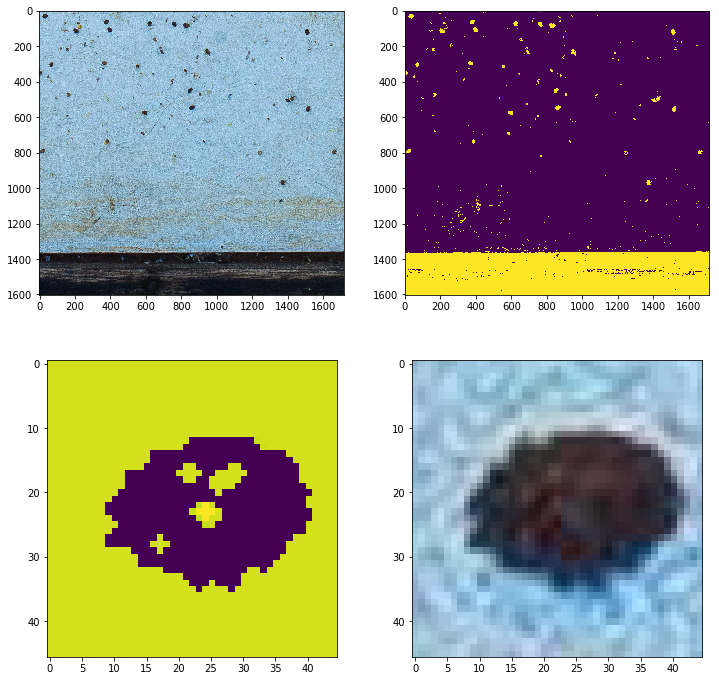

In [320]:
from skimage.morphology import closing, opening

fig, axes = plt.subplots(2, 2, figsize=(12, 12))
image = ic[100][:,:,1]
axes[0][0].imshow(ic[100])
thresh = threshold_otsu(image)
thresh2 = threshold_otsu(image[image < thresh])
binary = (image < thresh2)
axes[0][1].imshow((image < thresh))
annotations_xmls[100]
imagetest = ic[100].copy()
axes[1][1].imshow(ic[100][12:12+46,9:9+45,:])
mask = np.zeros_like(imagetest)
mask[:,:,2] = imagetest[:,:,2] < 70
mask[:,:,1] = imagetest[:,:,1] < 70
mask[:,:,0] = imagetest[:,:,0] < 70

imagetest[imagetest[:, :, 2] < 50] = [0, 0, 0]
imagetest[imagetest[:, :, 0] < 50] = [0, 0, 0]
imagetest[imagetest[:, :, 1] < 50] = [0, 0, 0]
imagetest[imagetest[:, :, 2] > 70] = [255, 0, 0]
imagetest[imagetest[:, :, 0] > 70] = [255, 0, 0]
imagetest[imagetest[:, :, 1] > 70] = [255, 0, 0]
value_img = rgb2gray(imagetest)
var = value_img[12:12+46,9:9+45].copy()
var = opening(var)
axes[1][0].imshow(var)

[{'name': 'Varroa', 'bbox': [931, 1074, 24, 25]},
 {'name': 'Varroa', 'bbox': [1521, 397, 19, 27]},
 {'name': 'Varroa', 'bbox': [1383, 332, 25, 27]},
 {'name': 'Varroa', 'bbox': [1438, 523, 26, 26]},
 {'name': 'Varroa', 'bbox': [1098, 46, 28, 25]},
 {'name': 'Varroa', 'bbox': [958, 934, 27, 25]},
 {'name': 'Varroa', 'bbox': [153, 130, 24, 26]},
 {'name': 'Varroa', 'bbox': [744, 553, 29, 30]},
 {'name': 'Varroa', 'bbox': [1489, 854, 20, 21]},
 {'name': 'Varroa', 'bbox': [1242, 1107, 18, 24]},
 {'name': 'Varroa', 'bbox': [144, 557, 26, 25]},
 {'name': 'Varroa', 'bbox': [1129, 1276, 28, 28]},
 {'name': 'Varroa', 'bbox': [254, 708, 30, 27]},
 {'name': 'Varroa', 'bbox': [907, 47, 19, 20]},
 {'name': 'Varroa', 'bbox': [795, 492, 16, 18]},
 {'name': 'Varroa', 'bbox': [927, 501, 19, 20]},
 {'name': 'Varroa', 'bbox': [429, 1141, 28, 26]},
 {'name': 'Varroa', 'bbox': [795, 646, 18, 21]},
 {'name': 'Varroa', 'bbox': [449, 794, 28, 25]},
 {'name': 'Varroa', 'bbox': [297, 60, 29, 26]},
 {'name': 'V

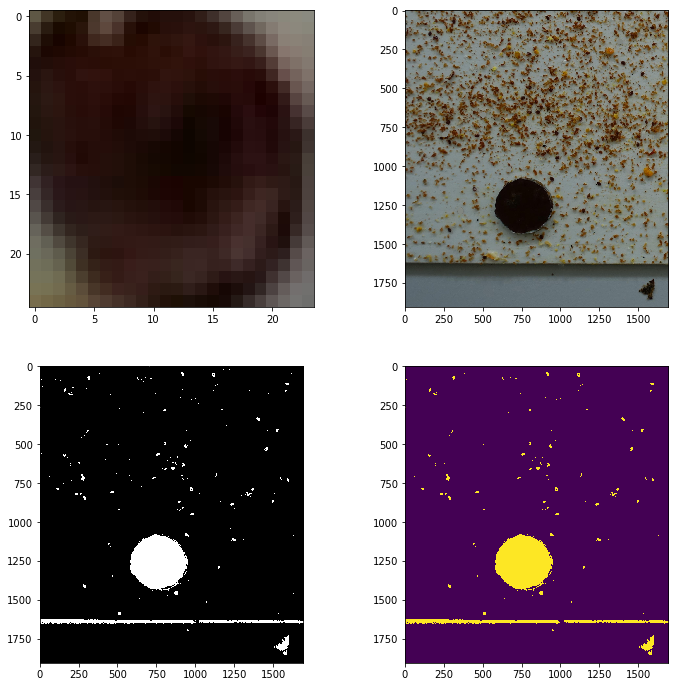

In [332]:
fig, axes = plt.subplots(2, 2, figsize=(12, 12))
image = ic[4].copy()
axes[0][0].imshow(image[1074:1074+25,931:931+24])
axes[0][1].imshow(image)
dark = np.logical_and(image[:, :, 1] < 50,np.logical_and(image[:, :, 0] < 50, image[:, :, 2] < 50))
image[dark] = [255, 255, 255]
image[~dark] = [0, 0, 0]

value_img= rgb2gray(image)
axes[1][0].imshow(image)
value_img = opening(value_img)
var = value_img[1074:1074+25,931:931+24].copy()
var = opening(var)
axes[1][1].imshow(value_img)


Add your implementation. Report the Precision, Recall and F1-score, by using all 50 images of the test-set, and considering 0.3 as the IoU threshold.

In [4]:
#Your code

## Part 3: Using MLP and CNNs

Add your implementation for the thrid part. Feel free to add your desirable functions, but please make sure you have proper functions for the final detection, where their input and output follows the same format as the previous parts.

In [5]:
#Your code

## Challenge

You can generate a json submission file by using the function ''**generate_pred_json**''. This prediction file can be uploaded online for evaluation (Please refer to section 3 of the project description for more details).

In [6]:
import numpy as np
import json

def generate_pred_json(data, tag='baseline'):
    '''
    Input
    - data: Is a dictionary d, such that:
          d = { 
              "ID_1": [], 
              "ID_2": [[x_21, y_21, w_21, h_21], [x_22, y_22, w_22, h_22]], 
              ... 
              "ID_i": [[x_i1, y_i1, w_i1, h_i1], ..., [x_iJ, y_iJ, w_iJ, h_iJ]],
              ... 
              "ID_N": [[x_N1, y_N1, w_N1, h_N1]],
          }
          where ID is the string id of the image (e.i. 5a05e86fa07d56baef59b1cb_32.00px_1) and the value the Kx4 
          array of intergers for the K predicted bounding boxes (e.g. [[170, 120, 15, 15]])
    - tag: (optional) string that will be added to the name of the json file.
    Output
      Create a json file, "prediction_[tag].json", conatining the prediction to EvalAI format.
    '''
    unvalid_key = []
    _data = data.copy()
    for key, value in _data.items():
        try:
            # Try to convert to numpy array and cast as closest int
            print(key)
            v = np.around(np.array(value)).astype(int)
            # Check is it is a 2d array with 4 columns (x,y,w,h)
            if v.ndim != 2 or v.shape[1] != 4:
                unvalid_key.append(key)
            # Id must be a string
            if not isinstance(key, str):
                unvalid_key.append(key)
            _data[key] = v.tolist()
        # Deal with not consistant array size and empty predictions
        except (ValueError, TypeError):
            unvalid_key.append(key)
    # Remove unvalid key from dictionnary
    for key in unvalid_key: del _data[key]
    
    with open('prediction_{}.json'.format(tag), 'w') as outfile:
        json.dump(_data, outfile)

In [7]:
#Your code